In [1]:
#target parameters of the polinomial f(x) = ax^3 + bx^2 + cx +d

a = 3
b = -2
c = -3
d = 4

Generiamo il train data: 

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a*x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d # ideal (target) function

sigma = 0 # noise standard deviation, for the moment absent
y_train = np.random.normal(a*x_train*x_train*x_train + b*x_train*x_train + c*x_train + d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a*x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d , sigma)

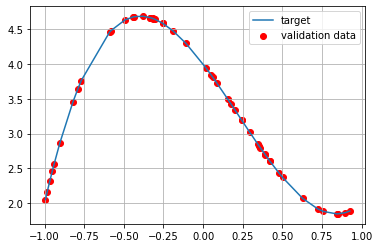

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

2025-06-12 15:00:19.448811: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-12 15:00:19.466271: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-12 15:00:19.617203: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-12 15:00:19.751502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749733219.848322  420850 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749733219.87

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,451 (33.01 KB)

 Trainable params: 8,451 (33.01 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 12.4780 - mse: 12.4780 - val_loss: 10.4879 - val_mse: 10.4879
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.3019 - mse: 10.3019 - val_loss: 6.9695 - val_mse: 6.9695
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9267 - mse: 5.9267 - val_loss: 2.7821 - val_mse: 2.7821
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5404 - mse: 2.5404 - val_loss: 2.1612 - val_mse: 2.1612
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4781 - mse: 1.4781 - val_loss: 1.7272 - val_mse: 1.7272
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1498 - mse: 1.1498 - val_loss: 1.3850 - val_mse: 1.3850
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8859 - mse: 0.8859 - val_loss: 1.1044 - val_mse: 1.1044
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6760 - mse: 0.6760 - val_loss: 0.8570 - val_mse: 0.8570
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

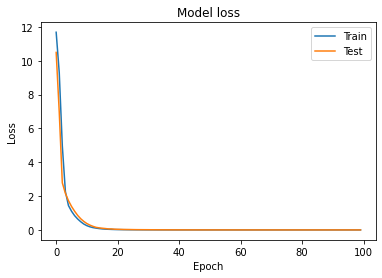

In [6]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


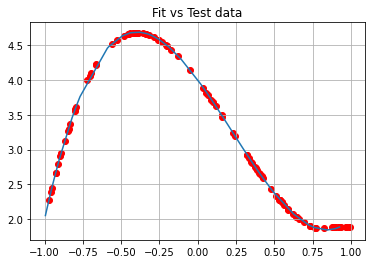

In [7]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.title('Fit vs Test data')
plt.show()

Cosa succede se provo a prevedere la posizione delle y fuori dal range $x \in [-1,1]$?

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


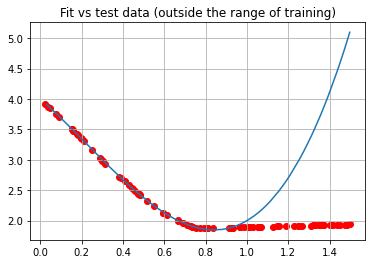

In [8]:
#prepare and predict data outside the training region  
x_predicted =np.random.uniform(0,1.5,100)
y_predicted = model.predict(x_predicted)
x_valid = np.random.uniform(0, 1.5, 100)
x_valid.sort()
y_target = a*x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d
plt.scatter(x_predicted, y_predicted, color ='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.title('Fit vs test data (outside the range of training)')
plt.show()

Questo risultato non ci sorprende, perchè i teoremi di rappresentazione garantiscono la convergenza ad una funzione Lebesque integrabile solo all'interno del range di training. 